In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 

In [30]:
data =pd.read_csv('haberman.csv')

### Assignment to be solved 

1) High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

2) Explain objective.

3) Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

4) Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

5) Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [31]:
data['Status']=np.where(data['status']==2, 'Not survived', 'survived')

In [32]:
data.drop('status',axis=1,inplace=True)

In [33]:
data.rename(columns = {'Status':'status'},inplace=True)


In [34]:
print('Number of points : ',data.shape[0]),
print('Number of features is ',data.shape[1], ' and they are ',data.columns[0],', ',data.columns[1],', ',data.columns[2],', ',data.columns[3])
print('Number of classes',len(data['status'].unique()),' they are ',data['status'].unique()) 
print('data-points per class','\n',data['status'].value_counts())

Number of points :  306
Number of features is  4  and they are  age ,  year ,  nodes ,  status
Number of classes 2  they are  ['survived' 'Not survived']
data-points per class 
 survived        225
Not survived     81
Name: status, dtype: int64


In [35]:
#Data imbalance

Status_1=round(225/(225+81),2)
Status_2=round(81/(225+81),2)

print('Dataset is imbalance with the ratio',Status_1,':',Status_2)

Dataset is imbalance with the ratio 0.74 : 0.26


In [36]:
#Checking for Null values 
data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

Observation:<br />
1) Dataset is imbalance with the ratio 0.74 : 0.26 <br />
2) There is zero data point with null values <br />

Note: Survival status  <br />
1 = the patient survived 5 years or longer(survived) <br />
2 = the patient died within 5 year (Not survived)<br />

Objective: To predict/classify survival of patients who had undergone surgery for breast cancer. i.e whether patient survived more than 5 years or survived less than 5 years

### Univaraite analysis(PDF, CDF, Boxplot, Voilin plots)

In [37]:
#Making two sub dataset

status_1=data[data['status']=='survived']
status_2=data[data['status']=='Not survived']

In [38]:
status_1.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [39]:
counts_1age, bin_edges_1age = np.histogram(status_1['age'], bins=10, 
                                 density = True)
counts_1year, bin_edges_1year = np.histogram(status_1['year'], bins=10, 
                                 density = True)
counts_1nodes, bin_edges_1nodes = np.histogram(status_1['nodes'], bins=10, 
                                 density = True)
counts_2age, bin_edges_2age = np.histogram(status_2['age'], bins=10, 
                                 density = True)
counts_2year, bin_edges_2year = np.histogram(status_2['year'], bins=10, 
                                 density = True)
counts_2nodes, bin_edges_2nodes = np.histogram(status_2['nodes'], bins=10, 
                                 density = True)

In [40]:
# User defined function for creating PDF and CDF plots
def pdf_cdf_plot(counts,bin_edges):
    pdf = counts/(sum(counts))
    print('pdf values :',pdf);
    #print(bin_edges);
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf);
    plt.plot(bin_edges[1:], cdf)

pdf values : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]


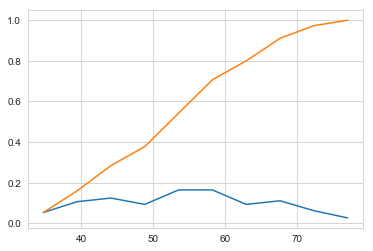

In [41]:
pdf_cdf_plot(counts_1age, bin_edges_1age)

pdf values : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


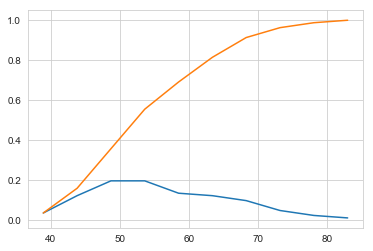

In [42]:
pdf_cdf_plot(counts_2age, bin_edges_2age)

Observation:

From the above to plot , its evident that the people having age less than or equal to 40 have very high chance of survival.

pdf values : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]


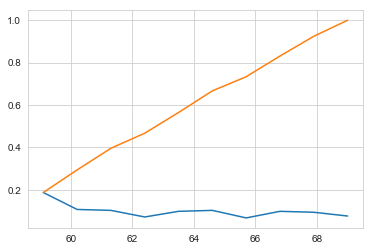

In [43]:
pdf_cdf_plot(counts_1year, bin_edges_1year)

pdf values : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]


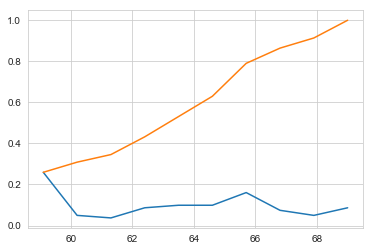

In [44]:
pdf_cdf_plot(counts_2year, bin_edges_2year)

Observation:

Year feature resembles the same as the age feature.

pdf values : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]


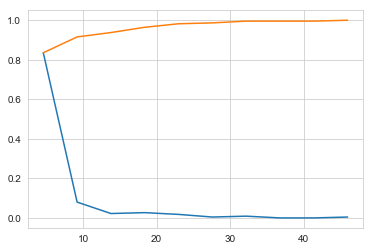

In [45]:
pdf_cdf_plot(counts_1nodes, bin_edges_1nodes)

pdf values : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


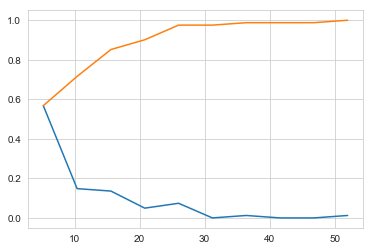

In [46]:
pdf_cdf_plot(counts_2nodes, bin_edges_2nodes)

Observation:

The patient having 50+ auxillary_lymph_node never survived.<br />
The patient having less than 5 auxillary_lymph_node has neverly 83% of survival chance.

Box Plot

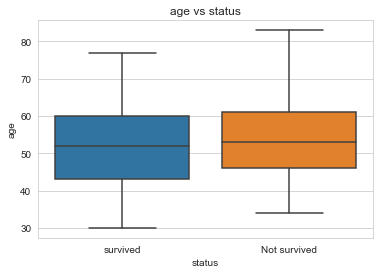

In [47]:
sns.boxplot(x='status',y='age', data=data,).set_title("age vs status")
plt.show()

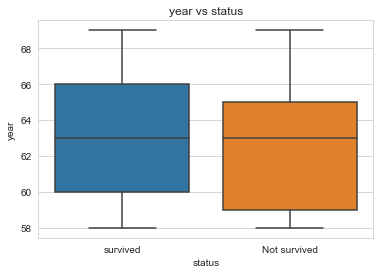

In [48]:
sns.boxplot(x='status',y='year', data=data).set_title("year vs status")
plt.show()

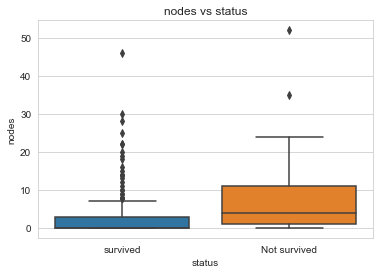

In [49]:
sns.boxplot(x='status',y='nodes', data=data).set_title("nodes vs status")
plt.show()

Observation:

One can easily see lot of outlier in the survival class.

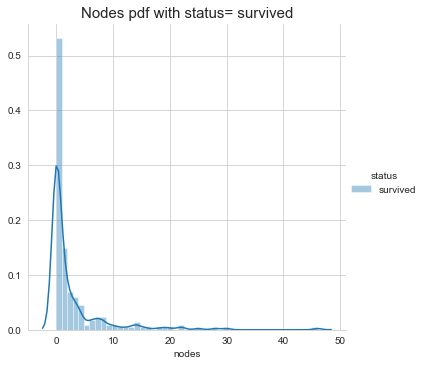

In [50]:
sns.FacetGrid(data[data['status']=='survived'], hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Nodes pdf with status= survived',fontsize=15)
plt.show();

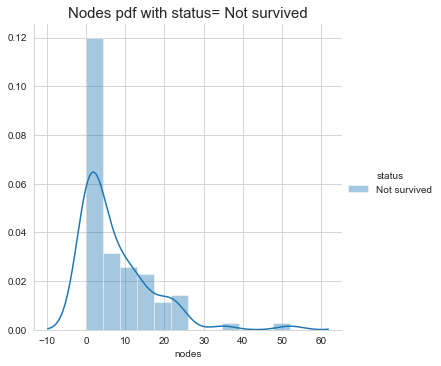

In [51]:
sns.FacetGrid(data[data['status']=='Not survived'], hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Nodes pdf with status= Not survived',fontsize=15)
plt.show();

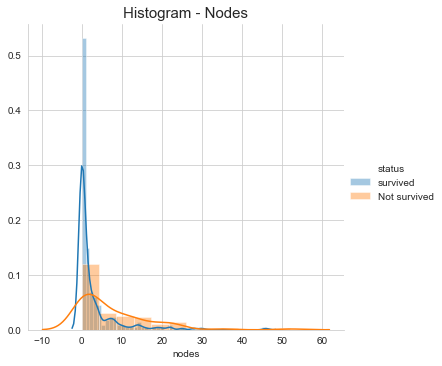

In [52]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram - Nodes',fontsize=15)
plt.show();

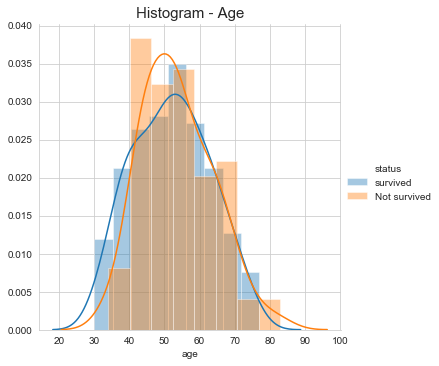

In [53]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram - Age',fontsize=15)
plt.show();

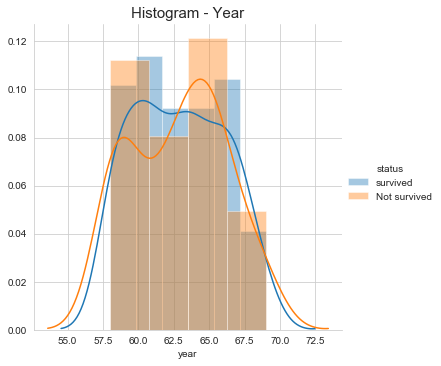

In [54]:
sns.FacetGrid(data, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram - Year',fontsize=15)
plt.show();

Observation:

There is no information that can be gather from the above as they are overlapped.

### Bi-varaite analysis

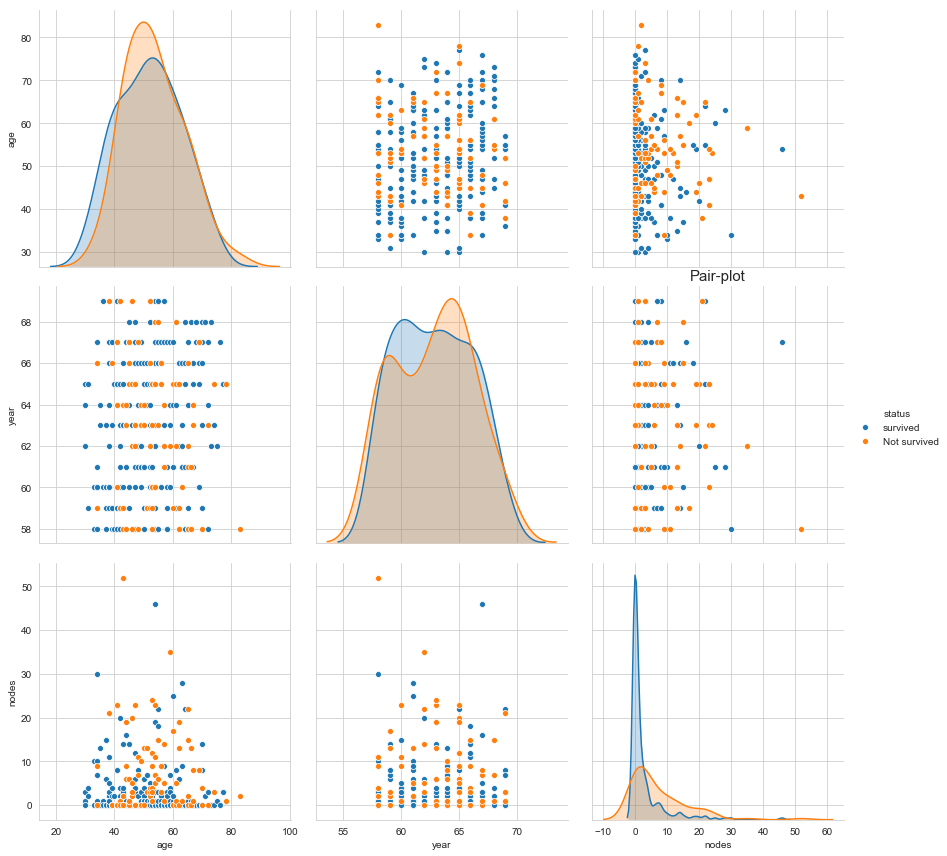

In [55]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="status", size=4);
plt.title('Pair-plot',fontsize=15)
plt.show()

Conclusion: <br/>

1) Age and nodes are useful features which talks clearly about the survival of patients who had undergone surgery for breast cancer.<br/>
2) People with age less than or equal 40 and having nodes less 30 have high probability of survival(more than 5 years) than others.<br/>
3) People having higher age have higher risk on the survival.<br/>
4) Around 90% of the people having node less than 10 have survived more than 5 year after a surgery.<br/>